<h1>Start of the Notebook</h1>
First, we need to import all the libraries necessary and the dataset into a dataframe.

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("dark")
sns.set_palette("deep")

df = pd.read_csv("Datasets/US Regional Sales Data.csv")

print(df.sample(5))

       OrderNumber Sales Channel WarehouseCode ProcuredDate   OrderDate  \
2796  SO - 0002897      In-Store  WARE-UHY1004     27/10/18     25/4/19   
3226  SO - 0003327        Online  WARE-UHY1004     4/2/2019  12/06/2019   
2871  SO - 0002972        Online  WARE-PUJ1005     4/2/2019  04/05/2019   
661    SO - 000762      In-Store  WARE-UHY1004    10/4/2018     16/8/18   
7580  SO - 0007681   Distributor  WARE-NMK1003      18/6/20  12/11/2020   

       ShipDate DeliveryDate CurrencyCode  _SalesTeamID  _CustomerID  \
2796    23/5/19      26/5/19          USD             7            7   
3226    14/6/19      23/6/19          USD            16           30   
2871    14/5/19      22/5/19          USD            14           11   
661   11/9/2018      17/9/18          USD             8           18   
7580  7/12/2020     13/12/20          USD            23           19   

      _StoreID  _ProductID  Order Quantity  Discount Applied  Unit Cost  \
2796       260           2               

Using df.info() we can see the properties of the dataset and observe the dtypes and the null values present. <br>
This is important so that we can see the properties the dataset.

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderNumber       7991 non-null   object 
 1   Sales Channel     7991 non-null   object 
 2   WarehouseCode     7991 non-null   object 
 3   ProcuredDate      7991 non-null   object 
 4   OrderDate         7991 non-null   object 
 5   ShipDate          7991 non-null   object 
 6   DeliveryDate      7991 non-null   object 
 7   CurrencyCode      7991 non-null   object 
 8   _SalesTeamID      7991 non-null   int64  
 9   _CustomerID       7991 non-null   int64  
 10  _StoreID          7991 non-null   int64  
 11  _ProductID        7991 non-null   int64  
 12  Order Quantity    7991 non-null   int64  
 13  Discount Applied  7991 non-null   float64
 14  Unit Cost         7991 non-null   object 
 15  Unit Price        7991 non-null   object 
dtypes: float64(1), int64(5), object(10)
memory

What we see is that there are no null values, and many object dtypes which will have to be changed. <br>
***Handling Dtypes*** <br>
1. DeliveryDate, ShipDate, ProcuredDate and OrderDate should be provide in datetime format.
2. Warehouse code should be observe to see how many unique warehouses there are and changed into numerical categories. A new DF should be created to ensure proper tracking of which warehouse is what #.
3. Unit Cost and Unit Price must be a float dtype.
4. All IDs (_SalesTeamID, _CustomerID, _StoreID, _ProductID) are handled in seperated dataframe with important information like unit price, unit cost, total orders, discounts, etc.
5. Sales Channel should be treated categorically and currency code should be treated object.
6. OrderNumber can be dropped.

<h1>Step 1</h1>

In [3]:
df["ProcuredDate"] = pd.to_datetime(df["ProcuredDate"], dayfirst=True)
df["OrderDate"] = pd.to_datetime(df["OrderDate"], dayfirst=True)
df["ShipDate"] = pd.to_datetime(df["ShipDate"], dayfirst=True)
df["DeliveryDate"] = pd.to_datetime(df["DeliveryDate"], dayfirst=True)

print(df["DeliveryDate"].dtype)
print(df["ShipDate"].dtype)
print(df["ProcuredDate"].dtype)
print(df["OrderDate"].dtype)

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


/var/folders/04/hyzrtb1s7wg3fykt90t4gnhw0000gn/T/ipykernel_61685/1602777466.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["ProcuredDate"] = pd.to_datetime(df["ProcuredDate"], dayfirst=True)
/var/folders/04/hyzrtb1s7wg3fykt90t4gnhw0000gn/T/ipykernel_61685/1602777466.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["OrderDate"] = pd.to_datetime(df["OrderDate"], dayfirst=True)
/var/folders/04/hyzrtb1s7wg3fykt90t4gnhw0000gn/T/ipykernel_61685/1602777466.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["ShipDate"] = pd.to_datetime(df["ShipDate"], dayfirst=Tru

<h1>Step 2</h1>

In [4]:
print(df["WarehouseCode"].unique())

['WARE-UHY1004' 'WARE-NMK1003' 'WARE-PUJ1005' 'WARE-XYS1001'
 'WARE-MKL1006' 'WARE-NBV1002']


***Label Encoding for Warehouse Codes***

In [5]:
label_encoder = LabelEncoder()
df["WarehouseCode"] = label_encoder.fit_transform(df["WarehouseCode"])

warehouse_mapping = pd.DataFrame({
    "WarehouseCode": label_encoder.classes_,
    "Encoded_Value": range(len(label_encoder.classes_))
})

print(warehouse_mapping)

  WarehouseCode  Encoded_Value
0  WARE-MKL1006              0
1  WARE-NBV1002              1
2  WARE-NMK1003              2
3  WARE-PUJ1005              3
4  WARE-UHY1004              4
5  WARE-XYS1001              5


***One-Hot Encoding (Create Binary Variables)***
Find potential relationships between warehouses and other variables

In [6]:
df = pd.get_dummies(df, columns=["WarehouseCode"], drop_first=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OrderNumber       7991 non-null   object        
 1   Sales Channel     7991 non-null   object        
 2   ProcuredDate      7991 non-null   datetime64[ns]
 3   OrderDate         7991 non-null   datetime64[ns]
 4   ShipDate          7991 non-null   datetime64[ns]
 5   DeliveryDate      7991 non-null   datetime64[ns]
 6   CurrencyCode      7991 non-null   object        
 7   _SalesTeamID      7991 non-null   int64         
 8   _CustomerID       7991 non-null   int64         
 9   _StoreID          7991 non-null   int64         
 10  _ProductID        7991 non-null   int64         
 11  Order Quantity    7991 non-null   int64         
 12  Discount Applied  7991 non-null   float64       
 13  Unit Cost         7991 non-null   object        
 14  Unit Price        7991 n

<h1>Step 3</h1>

In [7]:
df["Unit Cost"] = df["Unit Cost"].astype(str).str.replace(r"[\,]", "", regex=True)
df["Unit Price"] = df["Unit Price"].astype(str).str.replace(r"[\,]", "", regex=True)
df["Unit Cost"] = df["Unit Cost"].astype(str).str.replace(r"[\$]", "", regex=True).astype(float)
df["Unit Price"] = df["Unit Price"].astype(str).str.replace(r"[\$]", "", regex=True).astype(float)

print(f"Data type of unit cost: {df['Unit Cost'].dtype}\nData type of unit price: {df['Unit Price'].dtype}")

Data type of unit cost: float64
Data type of unit price: float64


<h1>Step 4</h1>

***Sales Team Performance Dataframe***

In [8]:
df['_SalesTeamID'] = df['_SalesTeamID'].astype(str)

sales_team_performance = df.groupby("_SalesTeamID").agg({
    "Unit Price": ["sum", "mean"],  # Total & average sales
    "Unit Cost": ["sum", "mean"], # Total & average cost
    'Order Quantity': ['sum', 'mean'], # Total & average quantity
    'Discount Applied': ['mean'], # Average discount
    "OrderNumber": "count"  # Number of sales handled
}).reset_index()

# Rename columns for better readability
sales_team_performance.columns = ["SalesTeamID", "Total_Sales", "Avg_Sale", 'Total_Cost', 'Avg_Cost', 
                                  'Total_Quantity', 'Avg_Quantity', 'Avg_Discount', "Number_of_Sales"]

print(f"{sales_team_performance.sample(2)}\n")
print(sales_team_performance.describe())

   SalesTeamID  Total_Sales     Avg_Sale  Total_Cost     Avg_Cost  \
13          21     640238.6  2162.968243   399692.55  1350.312669   
18          26     710052.6  2398.826351   446622.48  1508.859730   

    Total_Quantity  Avg_Quantity  Avg_Discount  Number_of_Sales  
13            1388      4.689189      0.114088              296  
18            1391      4.699324      0.111993              296  

         Total_Sales     Avg_Sale     Total_Cost     Avg_Cost  Total_Quantity  \
count      28.000000    28.000000      28.000000    28.000000       28.000000   
mean   651990.400000  2285.159947  408657.317857  1432.061550     1291.500000   
std     55210.989412   100.426027   35693.116502    65.956005       89.178348   
min    526305.100000  2125.036396  320630.640000  1298.099757     1163.000000   
25%    603551.075000  2190.663477  380278.325000  1382.747037     1225.750000   
50%    643042.550000  2289.395292  404137.045000  1446.116448     1285.500000   
75%    703253.775000  2349

<br>

***Store Performance Dataframe***

In [9]:
df['_StoreID'] = df['_StoreID'].astype(str)

store_performance = df.groupby("_StoreID").agg({
    "Unit Price": ["sum", "mean"],  # Total & average sales
    "Unit Cost": ["sum", "mean"], # Total & average cost
    'Order Quantity': ['sum', 'mean'], # Total & average quantity
    'Discount Applied': ['mean'], # Average discount
    "OrderNumber": "count"  # Number of sales handled
}).reset_index()

# Rename columns for better readability
store_performance.columns = ["StoreID", "Total_Sales", "Avg_Sale", 'Total_Cost', 'Avg_Cost', 
                                  'Total_Quantity', 'Avg_Quantity', 'Avg_Discount', "Number_of_Sales"]

print(f"{store_performance.sample(2)}\n")
print(store_performance.describe())

    StoreID  Total_Sales     Avg_Sale  Total_Cost     Avg_Cost  \
354      88      65834.2  2194.473333    42862.74  1428.758000   
147     231      55623.4  2418.408696    33143.77  1441.033478   

     Total_Quantity  Avg_Quantity  Avg_Discount  Number_of_Sales  
354             140      4.666667      0.120667               30  
147             109      4.739130      0.102609               23  

        Total_Sales     Avg_Sale    Total_Cost     Avg_Cost  Total_Quantity  \
count    367.000000   367.000000    367.000000   367.000000      367.000000   
mean   49743.136785  2282.241219  31178.214986  1429.554874       98.534060   
std    13589.866910   361.214908   8810.925343   248.124026       24.548676   
min    20897.300000  1452.411111  13437.060000   816.622778       35.000000   
25%    39895.150000  2012.835458  24716.925000  1246.354405       82.000000   
50%    49097.600000  2249.959259  30490.440000  1421.410741       99.000000   
75%    58383.800000  2519.586538  36862.475000

<br>

***Customer Grouping***

In [10]:
df['_CustomerID'] = df['_CustomerID'].astype(str)

customer_performance = df.groupby("_CustomerID").agg({
    "Unit Price": ["sum", "mean"],  # Total & average sales
    "Unit Cost": ["sum", "mean"], # Total & average cost
    'Order Quantity': ['sum', 'mean'], # Total & average quantity
    'Discount Applied': ['mean'], # Average discount
    "OrderNumber": "count"  # Number of sales handled
}).reset_index()

# Rename columns for better readability
customer_performance.columns = ["CustomerID", "Total_Sales", "Avg_Sale", 'Total_Cost', 'Avg_Cost', 
                                  'Total_Quantity', 'Avg_Quantity', 'Avg_Discount', "Number_of_Sales"]

print(f"{customer_performance.sample(2)}\n")
print(customer_performance.describe())

   CustomerID  Total_Sales     Avg_Sale  Total_Cost     Avg_Cost  \
21         29     440009.1  2458.151397   276517.25  1544.789106   
10         19     366282.3  2219.892727   236545.91  1433.611576   

    Total_Quantity  Avg_Quantity  Avg_Discount  Number_of_Sales  
21             828      4.625698      0.118324              179  
10             787      4.769697      0.104909              165  

         Total_Sales     Avg_Sale     Total_Cost     Avg_Cost  Total_Quantity  \
count      50.000000    50.000000      50.000000    50.000000       50.000000   
mean   365114.624000  2283.846935  228848.098000  1431.405417      723.240000   
std     38498.086182   111.335480   24360.425482    70.662125       75.817062   
min    289708.000000  2058.665269  182702.640000  1271.152994      611.000000   
25%    342656.425000  2220.922911  214959.557500  1386.727730      658.250000   
50%    359826.850000  2295.080168  224285.355000  1432.171248      718.500000   
75%    380288.650000  2359.02

<br>

***Product Grouping***

In [11]:
df['_ProductID'] = df['_ProductID'].astype(str)

product_performance = df.groupby("_ProductID").agg({
    "Unit Price": ["sum", "mean"],  # Total & average sales
    "Unit Cost": ["sum", "mean"], # Total & average cost
    'Order Quantity': ['sum', 'mean'], # Total & average quantity
    'Discount Applied': ['mean'], # Average discount
    "OrderNumber": "count"  # Number of sales handled
}).reset_index()

# Rename columns for better readability
product_performance.columns = ["ProductID", "Total_Sales", "Avg_Sale", 'Total_Cost', 'Avg_Cost', 
                                  'Total_Quantity', 'Avg_Quantity', 'Avg_Discount', "Number_of_Sales"]

print(f"{product_performance.sample(2)}\n")
print(product_performance.describe())

   ProductID  Total_Sales     Avg_Sale  Total_Cost    Avg_Cost  \
31        38     406870.9  2223.338251   256450.71  1401.37000   
33         4     485287.7  2426.438500   303646.93  1518.23465   

    Total_Quantity  Avg_Quantity  Avg_Discount  Number_of_Sales  
31             832      4.546448      0.108251              183  
33             878      4.390000      0.126650              200  

         Total_Sales     Avg_Sale     Total_Cost     Avg_Cost  Total_Quantity  \
count      47.000000    47.000000      47.000000    47.000000       47.000000   
mean   388419.812766  2282.725372  243455.423404  1430.881167      769.404255   
std     41845.308619   127.660322   26149.270734    80.225072       78.218106   
min    267457.300000  2034.980247  170133.120000  1276.444506      585.000000   
25%    361950.750000  2194.473715  227698.100000  1371.880120      720.000000   
50%    392693.700000  2276.896471  246675.690000  1422.317809      772.000000   
75%    414756.800000  2384.604287  

<h1>Step 5</h1>

In [12]:
df['Sales Channel'] = df['Sales Channel'].astype('category')
df['CurrencyCode'] = df['CurrencyCode'].astype(str)

print(f"Data type for Sales Channel: {df['Sales Channel'].dtype}/nData type for CurrencyCode: {df['CurrencyCode'].dtype}")

Data type for Sales Channel: category/nData type for CurrencyCode: object


<h1>Step 6</h1>

In [13]:
df = df.drop(columns='OrderNumber')

<h2>View of all Steps</h2>

In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Sales Channel     7991 non-null   category      
 1   ProcuredDate      7991 non-null   datetime64[ns]
 2   OrderDate         7991 non-null   datetime64[ns]
 3   ShipDate          7991 non-null   datetime64[ns]
 4   DeliveryDate      7991 non-null   datetime64[ns]
 5   CurrencyCode      7991 non-null   object        
 6   _SalesTeamID      7991 non-null   object        
 7   _CustomerID       7991 non-null   object        
 8   _StoreID          7991 non-null   object        
 9   _ProductID        7991 non-null   object        
 10  Order Quantity    7991 non-null   int64         
 11  Discount Applied  7991 non-null   float64       
 12  Unit Cost         7991 non-null   float64       
 13  Unit Price        7991 non-null   float64       
 14  WarehouseCode_1   7991 n

<h1>Finding best performing sales teams</h1>
The first relationship I will attempt to find is if there is a sales team that performs better than the rest. <br>
Of course total sales is of interest but also margins (which sales team has the highest average profit?). <br>
Which team sells the most when controlling for discounts? <br>
These are the questions we will attempt to answer.

***Creating a Profit Column***

In [15]:
sales_team_performance['Profit'] = sales_team_performance['Avg_Sale'] - sales_team_performance['Avg_Cost']
print(sales_team_performance.head())

  SalesTeamID  Total_Sales     Avg_Sale  Total_Cost     Avg_Cost  \
0           1     703245.4  2328.627152   440582.77  1458.883344   
1          10     582169.7  2239.114231   356985.86  1373.022538   
2          11     690093.3  2387.866090   435215.52  1505.936055   
3          12     737395.3  2348.392675   465338.63  1481.970159   
4          13     739639.8  2175.411176   457514.18  1345.629941   

   Total_Quantity  Avg_Quantity  Avg_Discount  Number_of_Sales      Profit  
0            1366      4.523179      0.127152              302  869.743808  
1            1219      4.688462      0.111115              260  866.091692  
2            1318      4.560554      0.116540              289  881.930035  
3            1393      4.436306      0.115924              314  866.422516  
4            1474      4.335294      0.119147              340  829.781235  


***Which team has the highest and lowest average profit?***

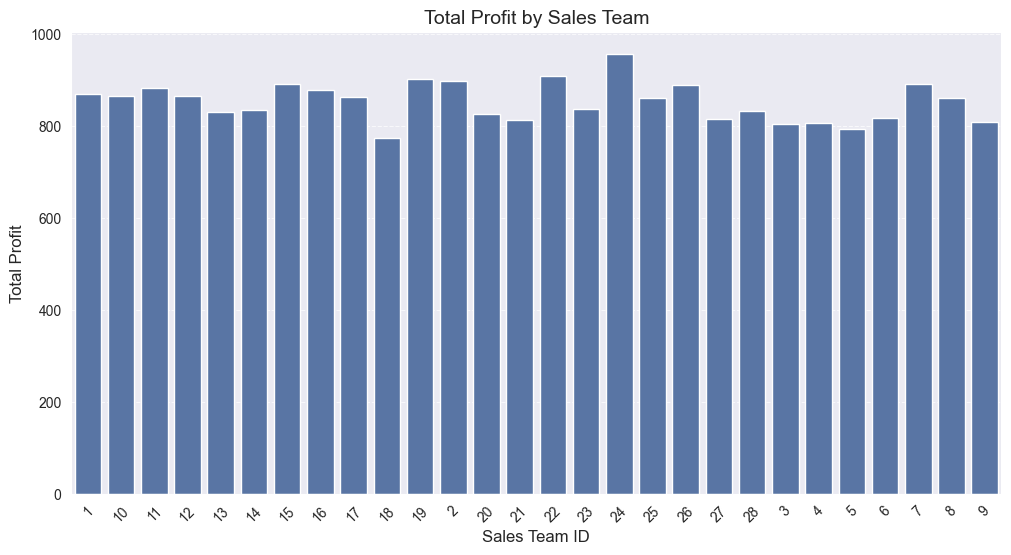

In [16]:
plt.figure(figsize=(12, 6))

sns.barplot(x="SalesTeamID", y="Profit", data=sales_team_performance)

plt.xlabel("Sales Team ID", fontsize=12)
plt.ylabel("Total Profit", fontsize=12)
plt.title("Total Profit by Sales Team", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

***Insights***
Sales team 24 has the highest average profit on its sales. <br>
Sales team 18 has the lowest average profit on its sales.

***Which team has the highest and lowest number of sales?***

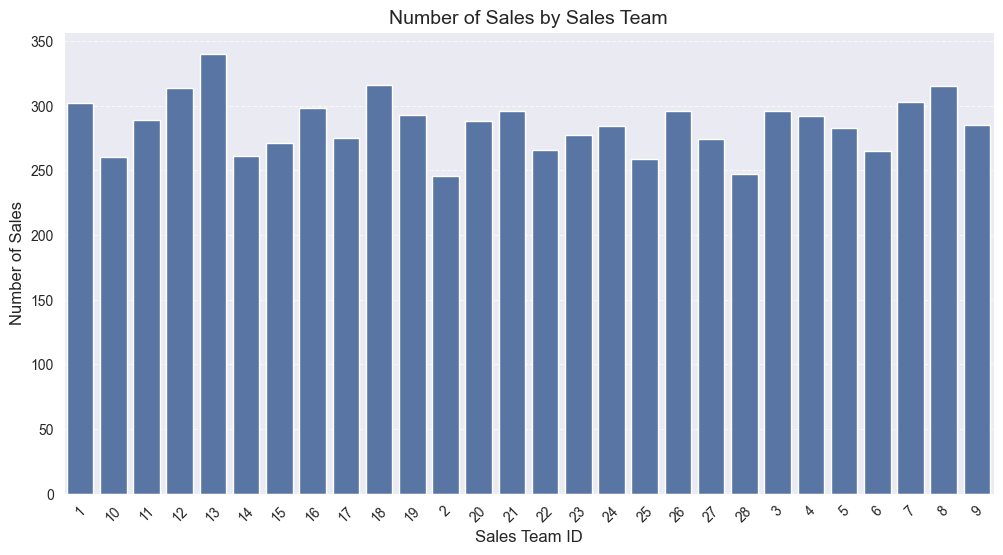

In [17]:
plt.figure(figsize=(12, 6))

sns.barplot(x="SalesTeamID", y="Number_of_Sales", data=sales_team_performance)

plt.xlabel("Sales Team ID", fontsize=12)
plt.ylabel("Number of Sales", fontsize=12)
plt.title("Number of Sales by Sales Team", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

***Insights***
Sales team 13 have the highest number of sales. <br>
Sales team 2 have the lowest number of sales.

***Are discounts correlated with number of sales?***

In [18]:
correlation = sales_team_performance["Avg_Discount"].corr(sales_team_performance["Number_of_Sales"])
print(f"Correlation between Avg_Discount and Number_of_Sales: {correlation}")

Correlation between Avg_Discount and Number_of_Sales: 0.04251241983752118


***Are discounts correlated with total sales?***

In [19]:
correlation = sales_team_performance["Avg_Discount"].corr(sales_team_performance["Total_Sales"])
print(f"Correlation between Avg_Discount and Total_Sales: {correlation}")

Correlation between Avg_Discount and Total_Sales: 0.09271812409546248


***Are discounts correlated with profit?***

In [20]:
correlation = sales_team_performance["Avg_Discount"].corr(sales_team_performance["Profit"])
print(f"Correlation between Avg_Discount and Profit: {correlation}")

Correlation between Avg_Discount and Profit: 0.09847729945967033


***Are discounts correlated with higher average quantity?***

In [21]:
correlation = sales_team_performance["Avg_Discount"].corr(sales_team_performance["Avg_Quantity"])
print(f"Correlation between Avg_Discount and Avg_Quantity: {correlation}")

Correlation between Avg_Discount and Avg_Quantity: 0.22996557702452788


Let's observe the correlation between average discount and average quantity.

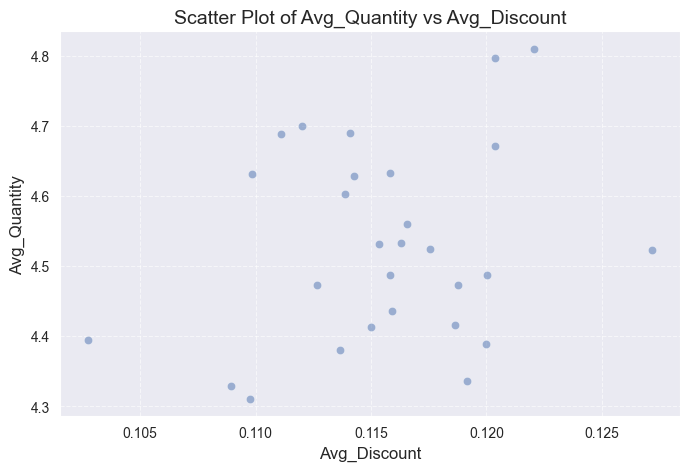

In [35]:
plt.figure(figsize=(8, 5))

sns.scatterplot(x=sales_team_performance["Avg_Discount"], y=sales_team_performance['Avg_Quantity'], alpha=0.5)

plt.xlabel("Avg_Discount", fontsize=12)
plt.ylabel("Avg_Quantity", fontsize=12)
plt.title("Scatter Plot of Avg_Quantity vs Avg_Discount", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()

***We can observe slight correlation between Avg_Discount and Avg_Quantity*** <br>
***We also observe a correlation coefficient of 0.23 indicating slight correlation***

We likely don't need to control for discounts given as they are all rather similar (only being seperated by 2 basis points) and there is nearly no correlation between our variables of interest.

<h1>Finding Best Performing Stores</h1>
This exercise will be fairly similar to the sales team as previously done. <br>
We will find the profit for each store to identify best-performers, number_of_sales, and discounts.

***Creating Profit Column***

In [23]:
store_performance['Profit'] = store_performance['Avg_Sale'] - store_performance['Avg_Cost']
print(store_performance.head())

  StoreID  Total_Sales     Avg_Sale  Total_Cost     Avg_Cost  Total_Quantity  \
0       1      59864.5  2217.203704    38431.20  1423.377778             122   
1      10      20897.3  2321.922222    13525.23  1502.803333              36   
2     100      82865.6  3452.733333    52512.96  2188.040000             108   
3     101      47080.9  2140.040909    28009.23  1273.146818              94   
4     102      56809.3  2272.372000    32609.09  1304.363600             122   

   Avg_Quantity  Avg_Discount  Number_of_Sales       Profit  
0      4.518519      0.115926               27   793.825926  
1      4.000000      0.123333                9   819.118889  
2      4.500000      0.127500               24  1264.693333  
3      4.272727      0.096364               22   866.894091  
4      4.880000      0.118400               25   968.008400  


***Identify best-performers regarding profit***

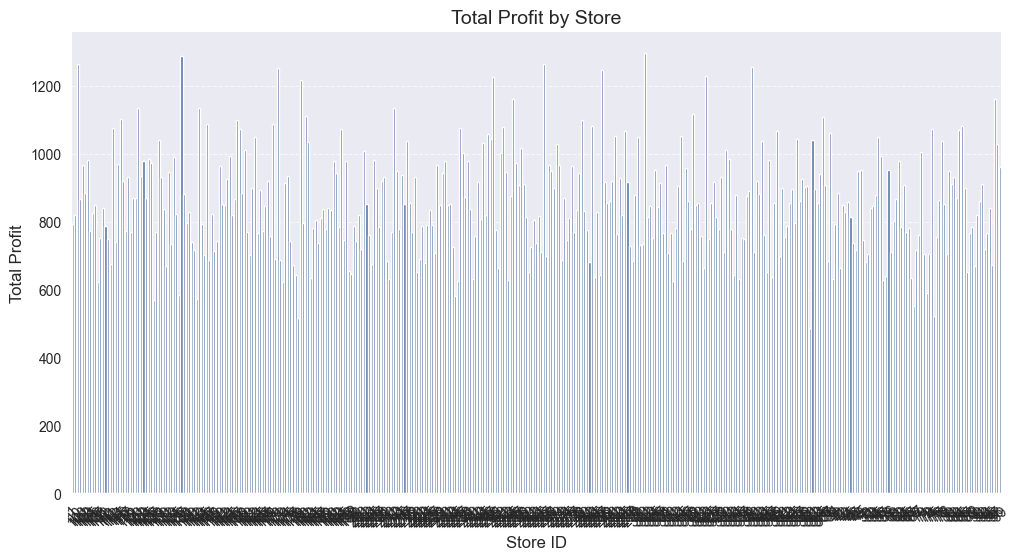

In [37]:
plt.figure(figsize=(12, 6))

sns.barplot(x="StoreID", y="Profit", data=store_performance)

plt.xlabel("Store ID", fontsize=12)
plt.ylabel("Total Profit", fontsize=12)
plt.title("Total Profit by Store", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

***Note:*** This is definitely not the best way to identify best-performers, let's try a table ranking each store instead.

In [25]:
store_profit = store_performance.groupby("StoreID")["Profit"].sum().reset_index()
store_profit = store_profit.sort_values(by="Profit", ascending=False)
print(f"Store mean profit: {store_profit['Profit'].mean()} \nStore stdev profit: {store_profit['Profit'].std()}\n")

print(store_profit)

Store mean profit: 852.6863445359827 
Store stdev profit: 149.73436072562808

    StoreID       Profit
226     302  1295.367826
43      138  1287.860000
186     267  1264.820000
2       100  1264.693333
268     340  1255.544783
..      ...          ...
32      128   568.066061
332      68   551.992917
340      75   522.766364
89       18   517.168824
291     361   487.518500

[367 rows x 2 columns]


***Best-Performers:*** 226, 43, 186. <br>
***Worst-Performers:*** 291, 89, 340.

***Store by Number of Sales***

In [26]:
store_sales = store_performance.groupby("StoreID")["Number_of_Sales"].sum().reset_index()
store_sales = store_sales.sort_values(by="Number_of_Sales", ascending=False)
print(f"Store mean number of sales: {store_sales['Number_of_Sales'].mean()} \nStore stdev number of sales: {store_sales['Number_of_Sales'].std()}\n")

print(store_sales)

Store mean number of sales: 21.77384196185286 
Store stdev number of sales: 4.784489078830414

    StoreID  Number_of_Sales
178      26               38
205     284               35
162     245               34
78       17               34
123      21               34
..      ...              ...
172     254               12
305      43               12
34       13               11
250     324               11
1        10                9

[367 rows x 2 columns]


***Best-Performers:*** 26, 284, 245. <br>
***Worst-Performers:*** 10, 324, 13.

***Are discounts correlated with number of sales?***

In [27]:
correlation = store_performance["Avg_Discount"].corr(store_performance["Number_of_Sales"])
print(f"Correlation between Avg_Discount and Number_of_Sales: {correlation}")

Correlation between Avg_Discount and Number_of_Sales: -0.08795791644321871


***Are discounts correlated with average quantity?***

In [28]:
correlation = store_performance["Avg_Discount"].corr(store_performance["Avg_Quantity"])
print(f"Correlation between Avg_Discount and Avg_Quantity: {correlation}")

Correlation between Avg_Discount and Avg_Quantity: 0.025708900730481633


***Are discounts correlated with profit?***

In [29]:
correlation = store_performance["Avg_Discount"].corr(store_performance["Profit"])
print(f"Correlation between Avg_Discount and Profit: {correlation}")

Correlation between Avg_Discount and Profit: 0.057924943889701


From the correlation analysis, average discount does appear to be correlated with any performance benefits like profit, quantity or number of sales.

<h1>Finding Best Performing Products</h1>
The insights of more interest here is the profit per product. Best-performing products could be identified. <br>Analysis of discounts given will also be interesting to see if some products receive more discounts and therefore, sell more.

In [30]:
product_performance['Profit'] = product_performance['Avg_Sale'] - product_performance['Avg_Cost']
print(product_performance.head())

  ProductID  Total_Sales     Avg_Sale  Total_Cost     Avg_Cost  \
0         1     329666.8  2034.980247   206784.01  1276.444506   
1        10     424089.9  2524.344643   261611.39  1557.210655   
2        11     414736.7  2278.773077   252865.86  1389.372857   
3        12     401671.7  2219.180663   251963.41  1392.063039   
4        13     375052.6  2143.157714   244779.70  1398.741143   

   Total_Quantity  Avg_Quantity  Avg_Discount  Number_of_Sales      Profit  
0             681      4.203704      0.109938              162  758.535741  
1             755      4.494048      0.122738              168  967.133988  
2             814      4.472527      0.123516              182  889.400220  
3             827      4.569061      0.116906              181  827.117624  
4             777      4.440000      0.116171              175  744.416571  


***Identifying Best-Performing Products by Profit***

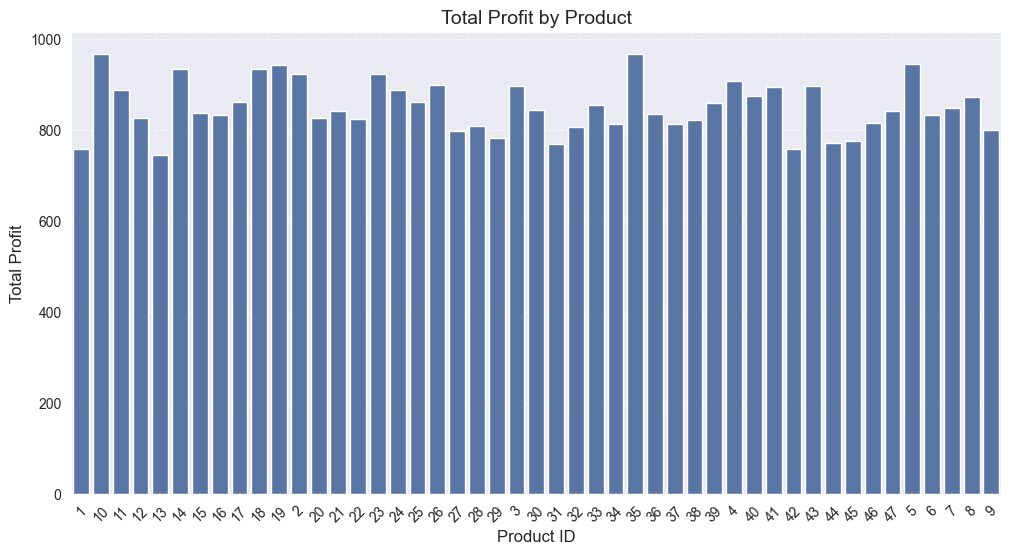

In [31]:
plt.figure(figsize=(12, 6))

sns.barplot(x="ProductID", y="Profit", data=product_performance)

plt.xlabel("Product ID", fontsize=12)
plt.ylabel("Total Profit", fontsize=12)
plt.title("Total Profit by Product", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

***Best-performing Products:*** 35, 10, 5 <br>
***Worst-performing Products:*** 13, 1, 42

***Is Average Discount Correlated With the Number of Sales?***

In [32]:
correlation = product_performance["Avg_Discount"].corr(product_performance["Number_of_Sales"])
print(f"Correlation between Avg_Discount and Avg_Quantity: {correlation}")

Correlation between Avg_Discount and Avg_Quantity: 0.21937835313002121


***Now let's plot to visualize the light correlation***

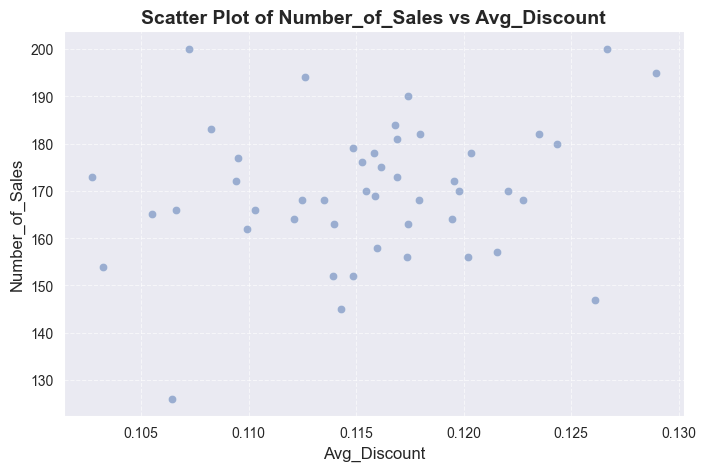

In [33]:
plt.figure(figsize=(8, 5))

sns.scatterplot(x=product_performance["Avg_Discount"], y=product_performance['Number_of_Sales'], alpha=0.5)

plt.xlabel("Avg_Discount", fontsize=12)
plt.ylabel("Number_of_Sales", fontsize=12)
plt.title("Scatter Plot of Number_of_Sales vs Avg_Discount", fontsize=14, fontweight="bold")
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()

<h1>Creating a Correlation Map With the Main Dataframe</h1>

In [40]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Sales Channel     7991 non-null   category      
 1   ProcuredDate      7991 non-null   datetime64[ns]
 2   OrderDate         7991 non-null   datetime64[ns]
 3   ShipDate          7991 non-null   datetime64[ns]
 4   DeliveryDate      7991 non-null   datetime64[ns]
 5   CurrencyCode      7991 non-null   object        
 6   _SalesTeamID      7991 non-null   object        
 7   _CustomerID       7991 non-null   object        
 8   _StoreID          7991 non-null   object        
 9   _ProductID        7991 non-null   object        
 10  Order Quantity    7991 non-null   int64         
 11  Discount Applied  7991 non-null   float64       
 12  Unit Cost         7991 non-null   float64       
 13  Unit Price        7991 non-null   float64       
 14  WarehouseCode_1   7991 n

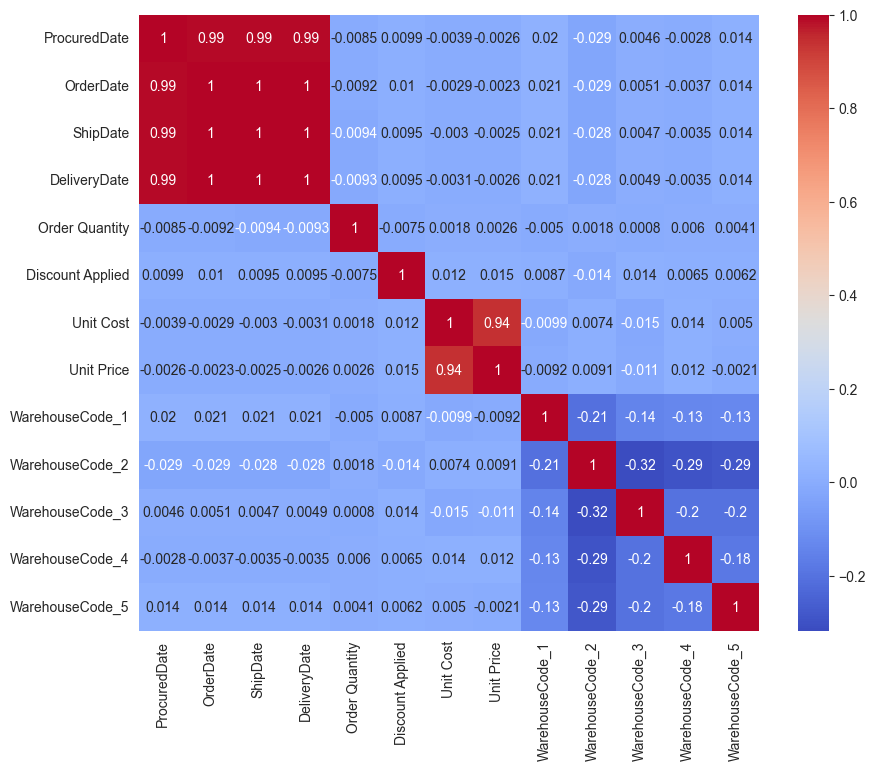

In [42]:
df = df.drop(columns=["CurrencyCode", "_SalesTeamID", "_ProductID", "_CustomerID", "_StoreID", "Sales Channel"])

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

<h1>Saving Main DataFrame to CSV</h1>

In [43]:
df.to_csv("cleaned_data.csv", index=False)

***End of Notebook***